# House Prices: Advanced Regression Techniques

Kaggle Link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

This problem is all about predicting the price of a house based on various features available. 

## General Lifecycle of a Data Science Project;
1. Identifying, Understanding and Framing the business problem 
2. Data Collection and Data Processing
3. Data Analysis
4. Feature Engineering & Feature Selection
5. Model Building and Evaluation
6. Model Deployment

We already have the Data readily available from Kaggle. In this notebook we shall look into the Data Analysis part of the problem.<br><br>
We shall try to understand more about the data in this notebook (aspects like type of features, their distribution, correlation with dependent feature(salePrice) etc.)

## Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None) # To display all columns of the dataset

In [7]:
data = pd.read_csv(r"data/train.csv")
#dataTest = pd.read_csv(r"data/test.csv")
print(data.shape)

(1460, 81)


There a 81 features/columns available which is quite high for us to perform analysis on.

In [9]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Missing Values

In [26]:
# Extracting the features with null values
featuresWithNull = [F for F in data.columns if data[F].isnull().sum()>0]

print("% of Null values by column;\n")
for F in featuresWithNull:
    v = np.round((data[F].isnull().sum())*100/data.shape[0],2)
    print(F," ",v,"%")

% of Null values by column;

LotFrontage   17.74 %
Alley   93.77 %
MasVnrType   0.55 %
MasVnrArea   0.55 %
BsmtQual   2.53 %
BsmtCond   2.53 %
BsmtExposure   2.6 %
BsmtFinType1   2.53 %
BsmtFinType2   2.6 %
Electrical   0.07 %
FireplaceQu   47.26 %
GarageType   5.55 %
GarageYrBlt   5.55 %
GarageFinish   5.55 %
GarageQual   5.55 %
GarageCond   5.55 %
PoolQC   99.52 %
Fence   80.75 %
MiscFeature   96.3 %


There are missing values for quite a few features. We shall see their relation with SalePrice by plotting median price for each category (missing or not missing).

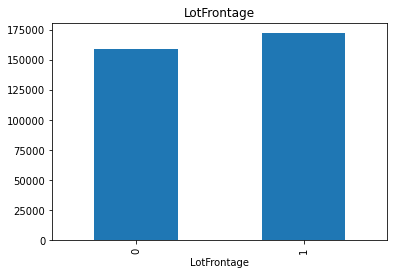

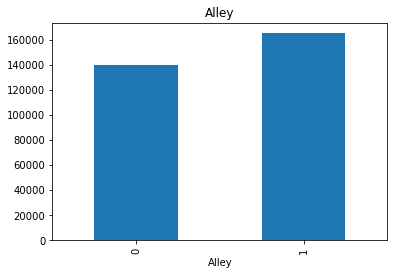

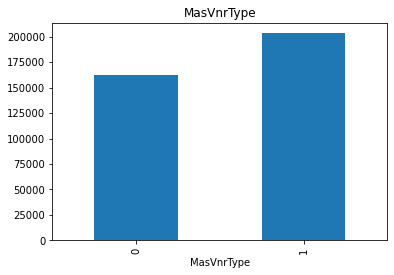

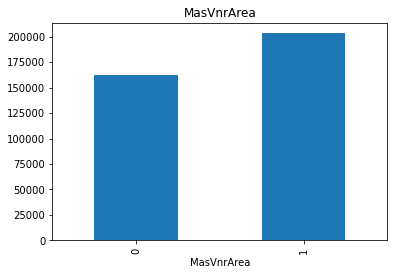

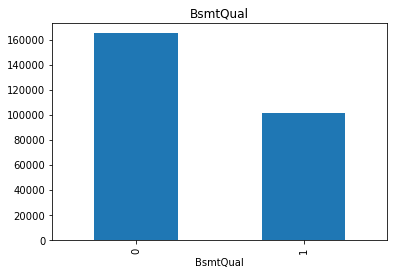

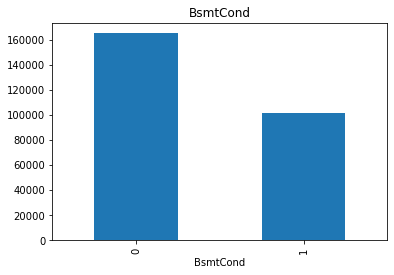

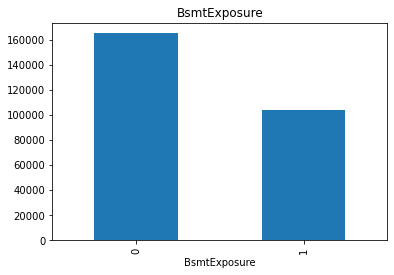

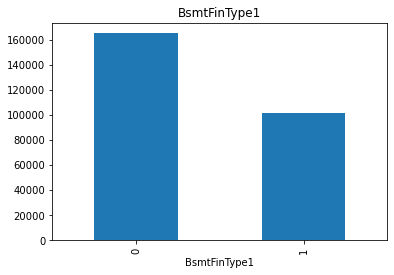

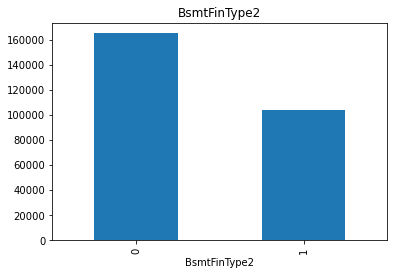

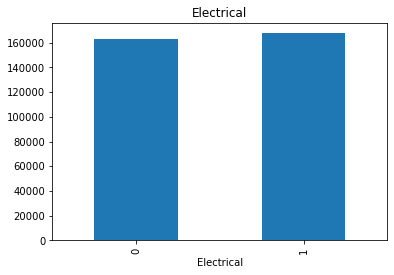

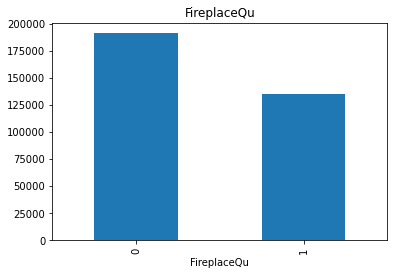

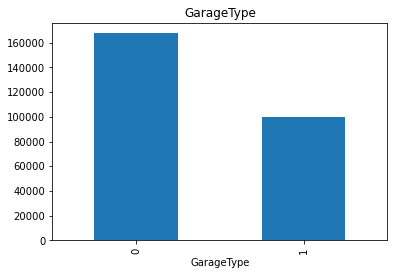

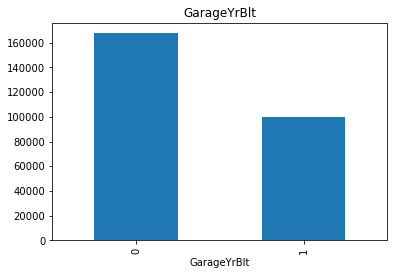

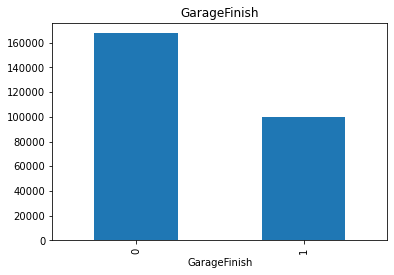

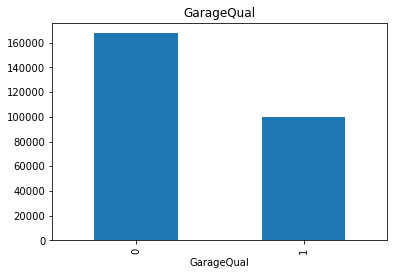

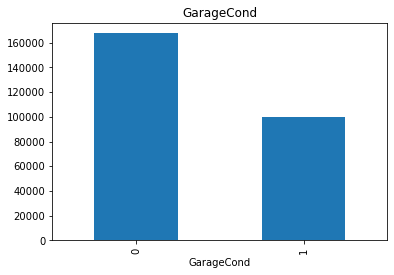

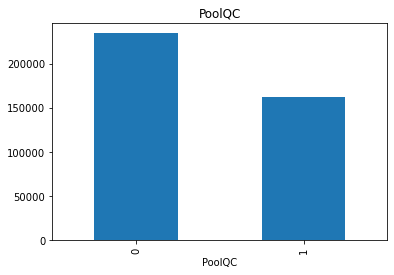

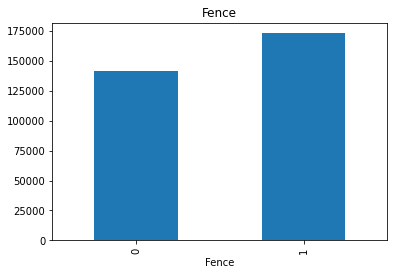

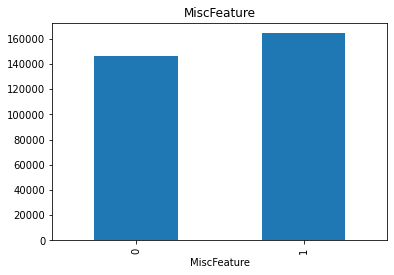

In [31]:
for F in featuresWithNull:
    data_ = data.copy()
    
    # let's create column that indicates 1 if the observation was missing or 0 otherwise
    data_[F] = np.where(data_[F].isnull(), 1, 0)
    
    # let's compute the median SalePrice for each category (missing or not missing)
    data_.groupby(F)['SalePrice'].median().plot.bar()
    plt.title(F)
    plt.show()

Here we can see the relation between the missing values and the dependent variable. For most features the median SalePrice is higher if the respective feature value is missing. We shall deal with these missing values in Feature Engineering section.

## Numerical Variables

In [34]:
# Extracting numerical features
numericalFs = [F for F in data.columns if data[F].dtypes != 'O']  #columns not of Object type

print('Total Numerical features: ', len(numericalFs))


data[numericalFs].head()

Total Numerical features:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Datetime Variables

We have 4 variables with 'year' values. We cannot deal with them like regular numerical features.

In [35]:
# manually extracting year features
yearFs = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

data[yearFs].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


Text(0.5, 1.0, 'House Price vs YearSold')

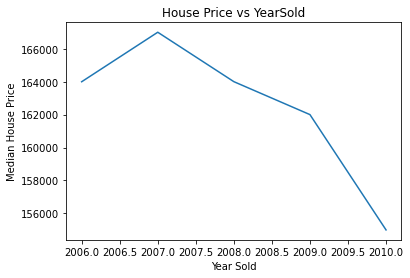

In [37]:
# visualizing the relation between yearSold variable and SalePrice
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

Usually the salePrice should have an increasing trend, but here we clearly notice the reverse trend.

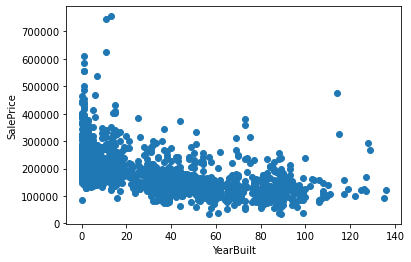

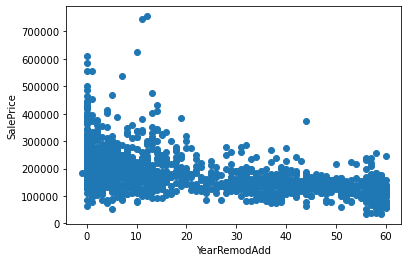

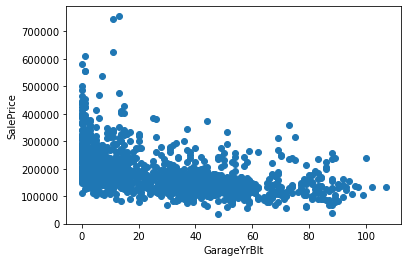

In [38]:
# we will see the relation between 'yearSold' feature with other year features. We shall compute no. of years passed for each feature
for F in yearFs:
    if F!='YrSold':
        data_=data.copy()
        
        ## We will compute the difference between year variable and year the house was sold for
        data_[F]=data_['YrSold']-data_[F]

        plt.scatter(data_[F],data_['SalePrice'])
        plt.xlabel(F)
        plt.ylabel('SalePrice')
        plt.show()


The X-axis indicated the number of years old the feature value is when the house was sold. We can see that the older the house  (1st graph), older the remodification age (2nd graph) and older the Garage built (3rd graph) the lower the price of the house (which seems logical) .

### Discrete Numerical fetaures

In [47]:
discreteFs = [F for F in numericalFs if len(data[F].unique())<25 and F not in yearFs+['Id']]
print("Discrete Variables Count: {}".format(len(discreteFs)))
data[discreteFs].head()

Discrete Variables Count: 17


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


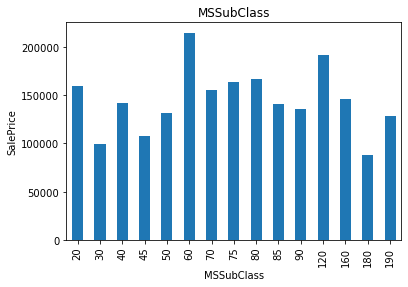

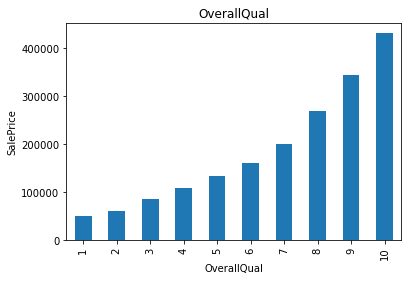

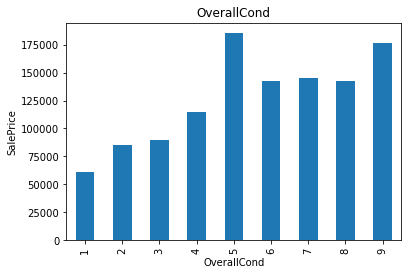

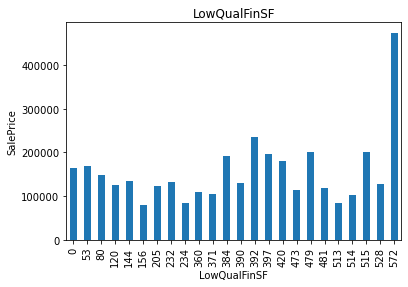

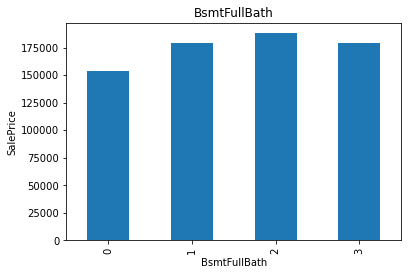

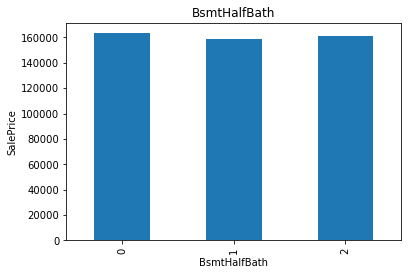

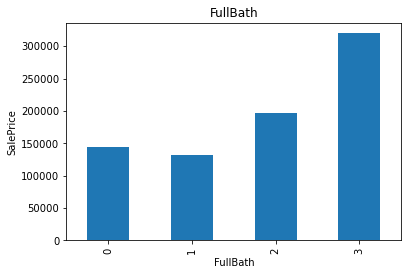

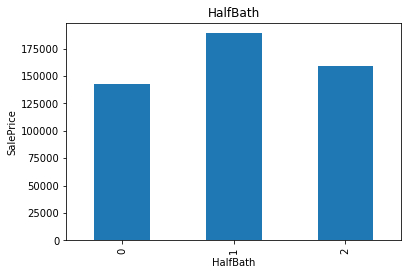

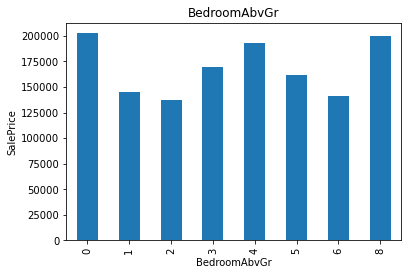

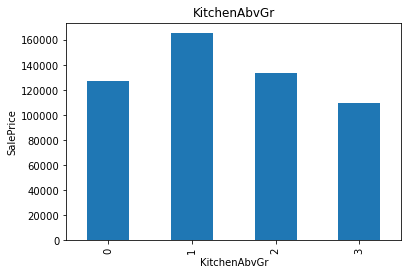

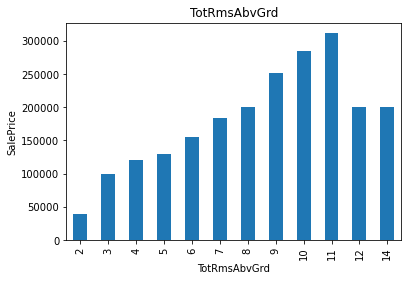

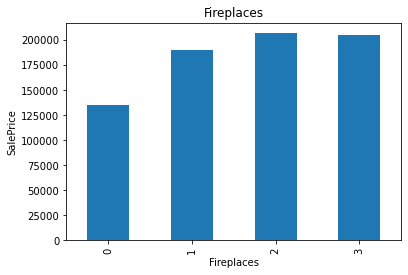

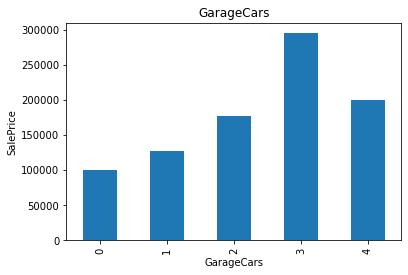

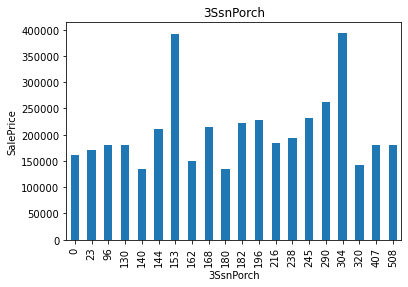

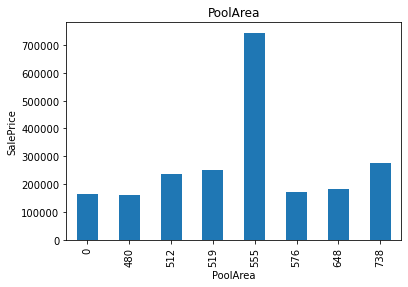

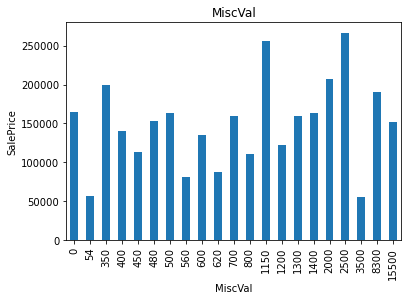

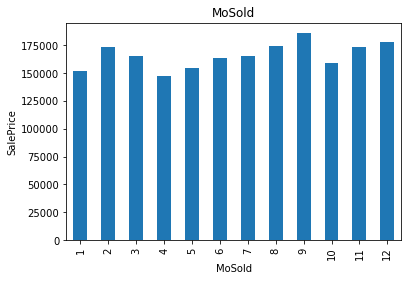

In [48]:
# Lets look at the relationship between Discrete features and SalePrice feature

for F in discreteFs:
    data_ = data.copy()
    data_.groupby(F)['SalePrice'].median().plot.bar()
    plt.xlabel(F)
    plt.ylabel('SalePrice')
    plt.title(F)
    plt.show()

**From the above simple bar plots we can easily find that most of the Discrete feature values influence the salePrice of the house**

### Continous Numerical fetaures

In [49]:
continuousFs = [F for F in numericalFs if F not in discreteFs+ yearFs+ ['Id']]
print("Continuous feature Count {}".format(len(continuousFs)))
data[continuousFs].head()

Continuous feature Count 16


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


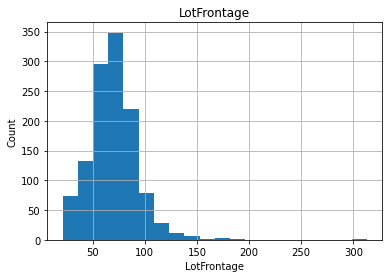

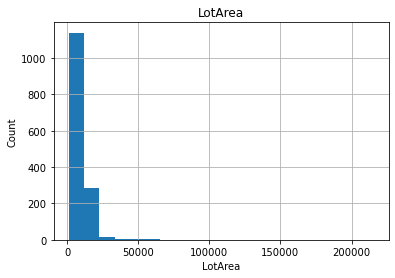

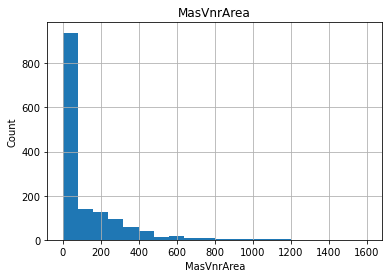

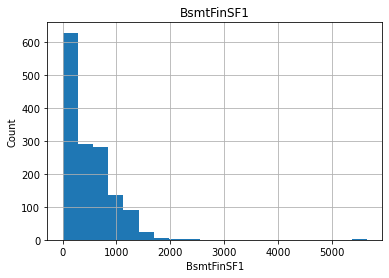

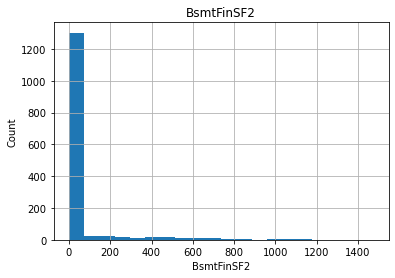

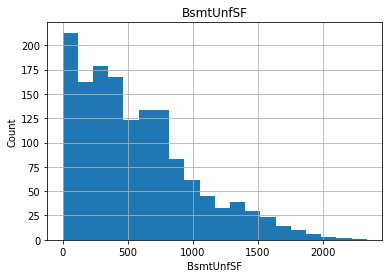

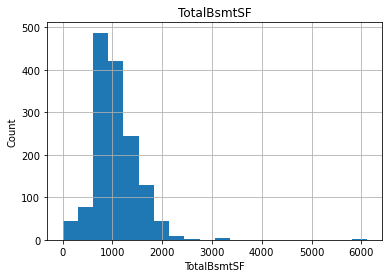

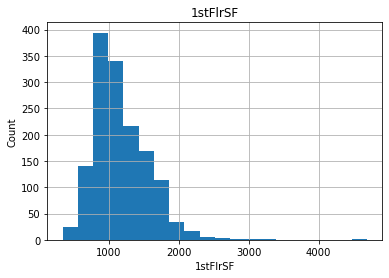

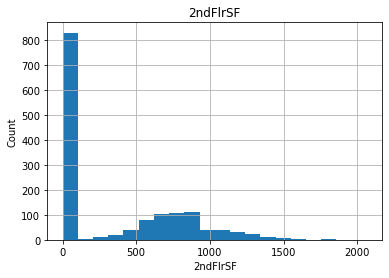

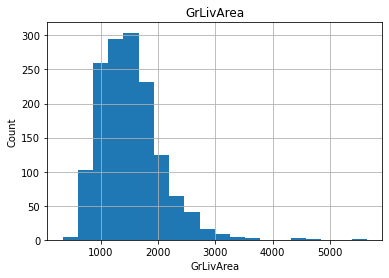

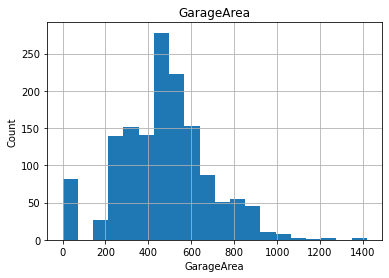

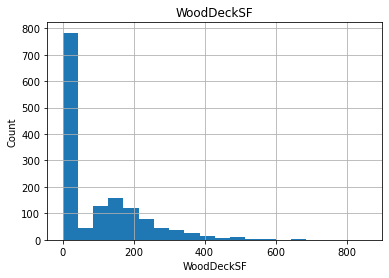

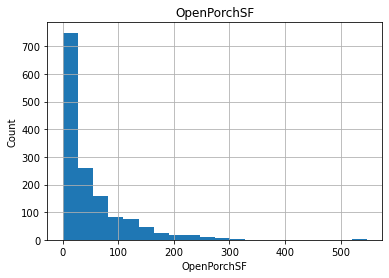

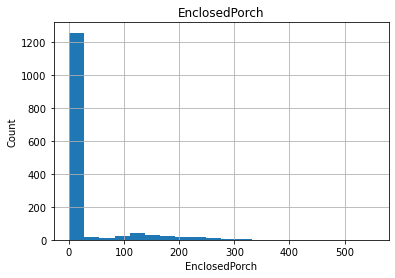

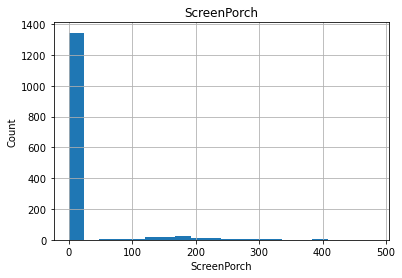

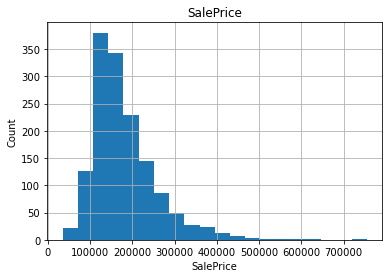

In [51]:
# Lets look at the relationship between Continous features and SalePrice feature

for F in continuousFs:
    data_ = data.copy()
    data_[F].hist(bins=20)
    plt.xlabel(F)
    plt.ylabel("Count")
    plt.title(F)
    plt.show()


**Most features are not distributed normally as we can them in above plots. Usually for regression problem its always better to transform the feature values into normal distribution. We shall convert the values using simple 'Log' function.**

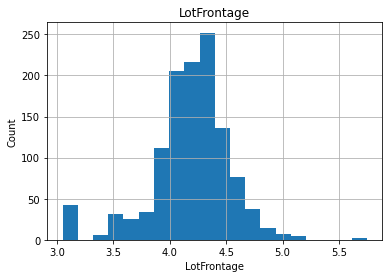

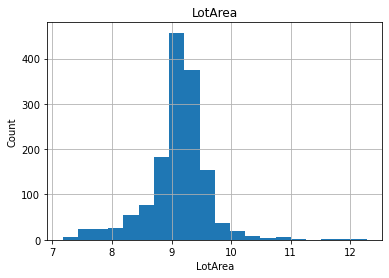

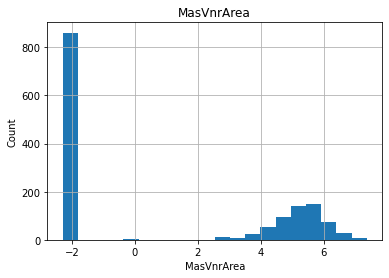

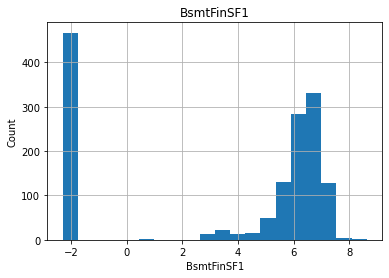

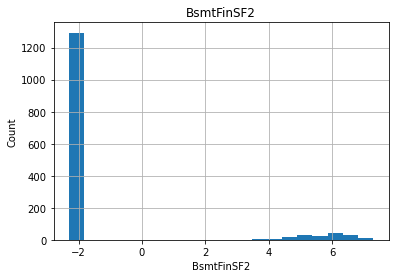

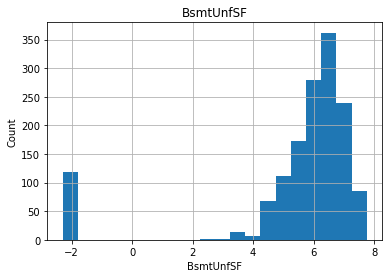

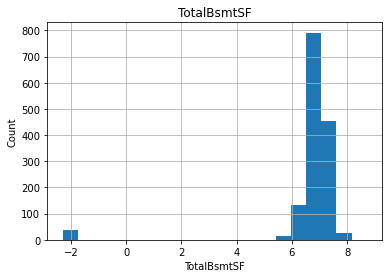

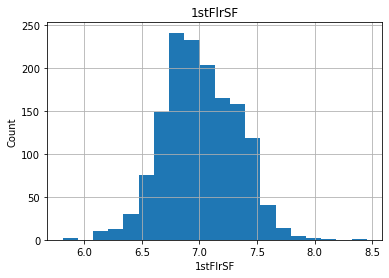

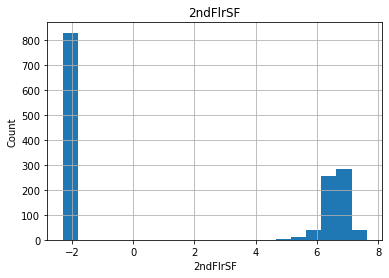

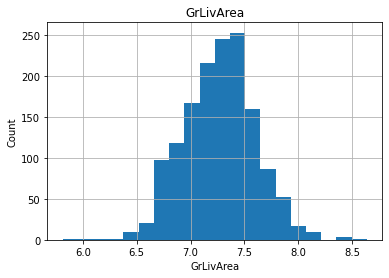

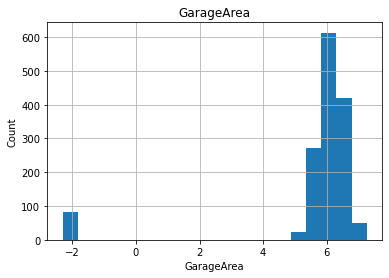

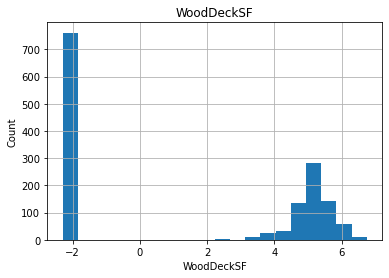

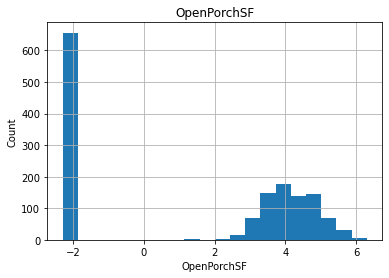

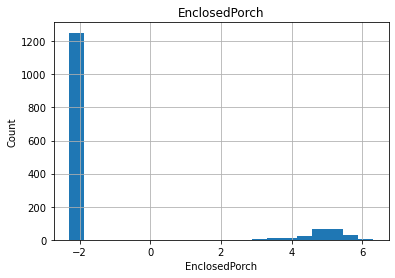

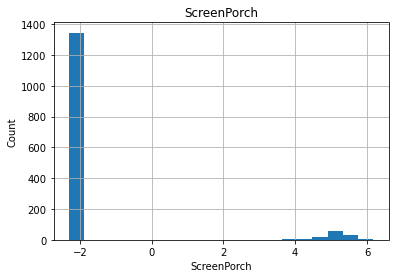

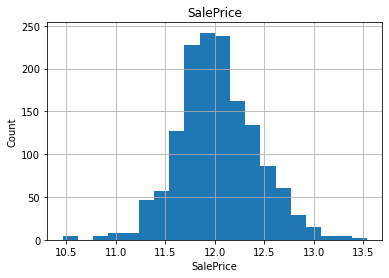

In [53]:
data_ = data.copy()
for F in continuousFs:
    data_[F]=np.log(data_[F]+0.1) #Adding a small constant value(0.1) so that the log function can gracefully handle zero values

for F in continuousFs:
    data_[F].hist(bins=20)
    plt.xlabel(F)
    plt.ylabel("Count")
    plt.title(F)
    plt.show()

**We can see how the skewness has decreased compared to the normal values(does not look perfect through). There are other  methods as well like Box-Cox transformation, Z-Score transformation etc., that can be used to normalise the distribution.**

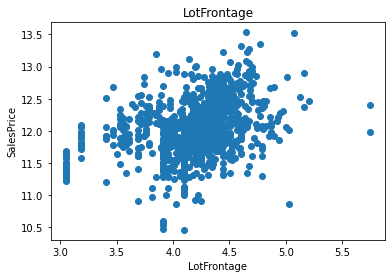

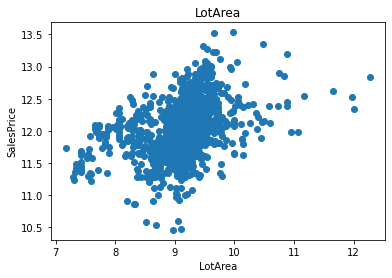

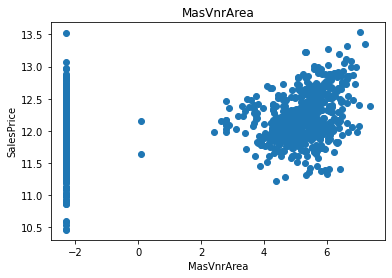

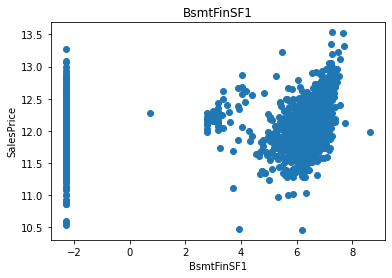

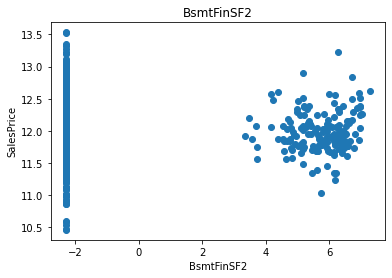

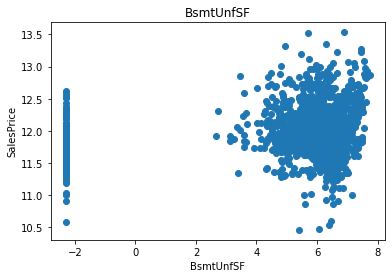

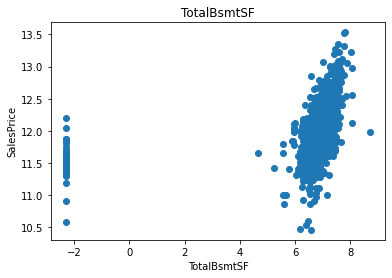

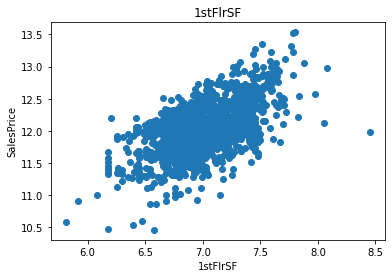

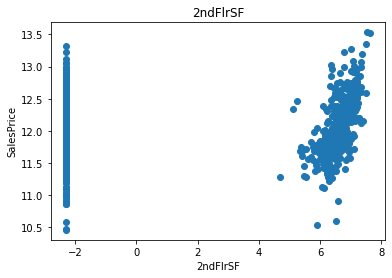

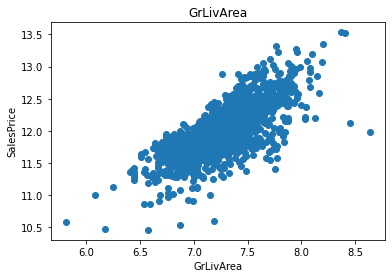

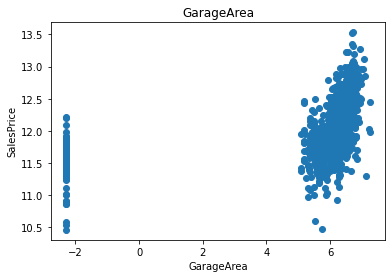

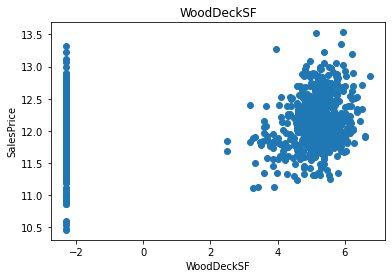

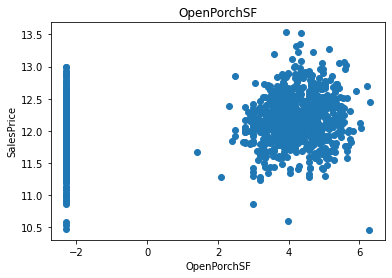

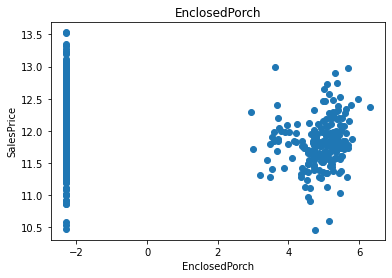

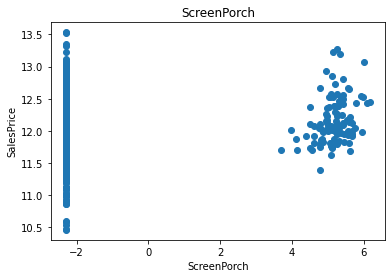

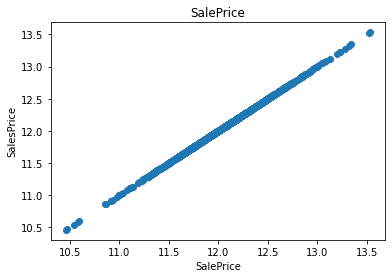

In [54]:
# We shall see the relation between the normalised fetaures and normalised salePrice feature

for F in continuousFs:
    plt.scatter(data_[F],data_['SalePrice'])
    plt.xlabel(F)
    plt.ylabel('SalesPrice')
    plt.title(F)
    plt.show()


**We can see the relation of features with salePrice;**<br>
**1. Some features like 'LotFrontage','BsmtFinSF2' etc., are randomly distributed. No specific relation could be extracted with them.**<br> 
**2. Some features like '1stFlrSF','GrLivArea' have visible relationship with salePrice.**

#### Outliers

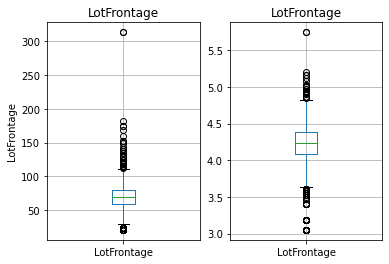

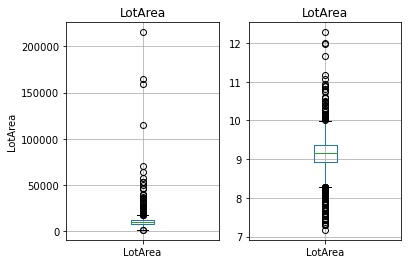

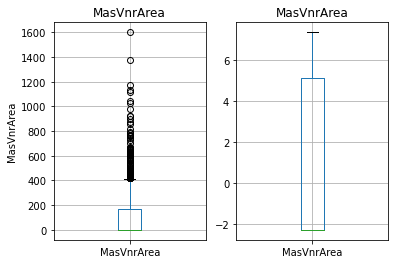

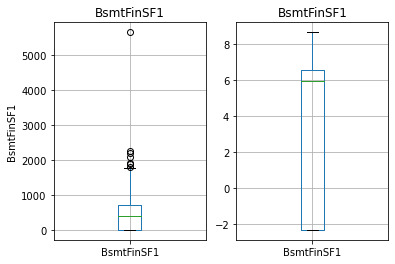

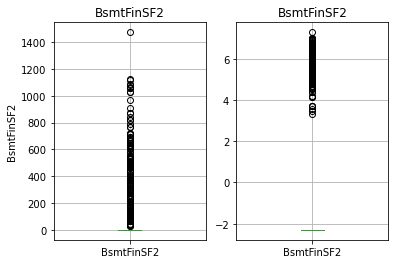

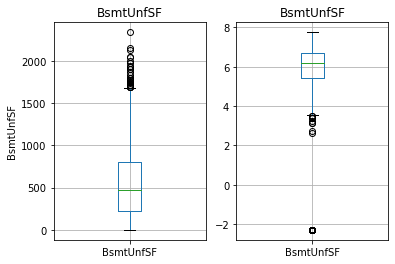

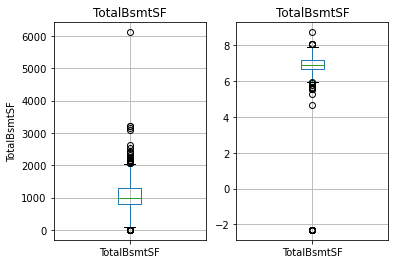

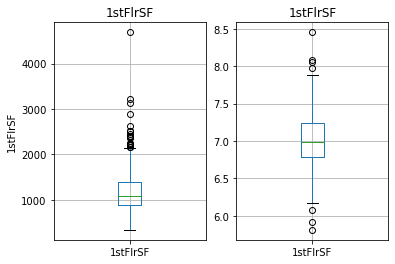

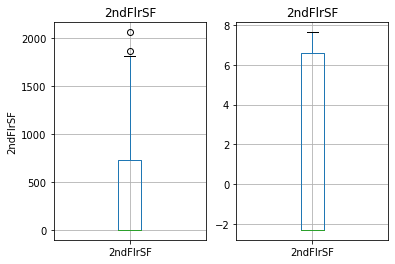

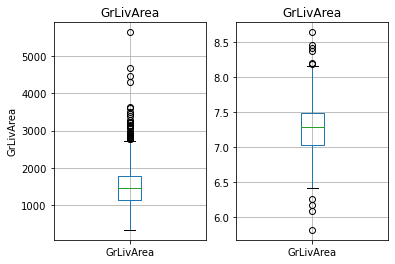

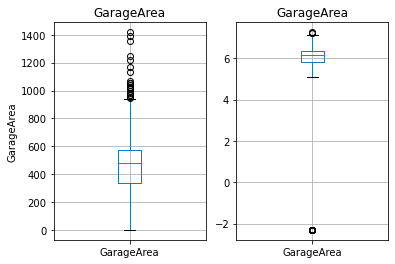

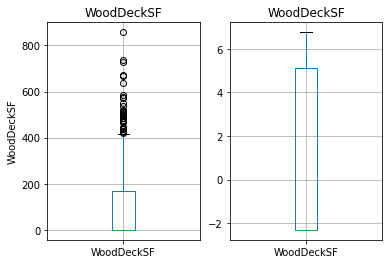

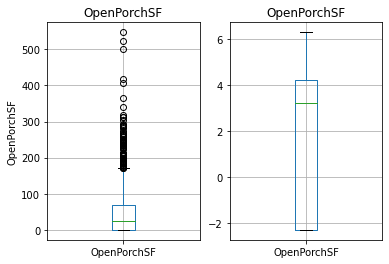

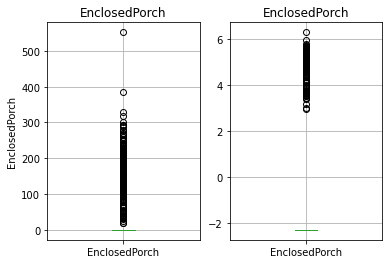

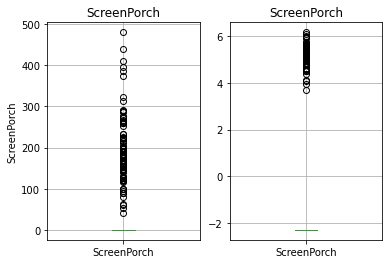

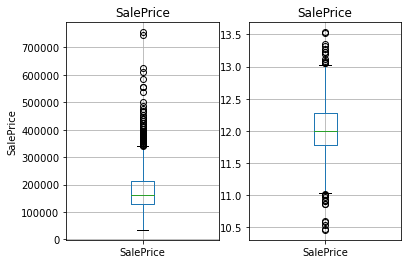

In [58]:
for F in continuousFs:
    plt.subplot(1,2,1)
    data.boxplot(column=F) #original data
    plt.ylabel(F)
    plt.title(F)
    
    plt.subplot(1,2,2)
    data_.boxplot(column=F) #logarithmic data
    #plt.ylabel(F)
    plt.title(F)
    
    plt.show()

**I have plotted boxplot to check for outliers in each feature.Here i used both normal data as well as log data to plot beside each other. You can see that some features have no outliers or reduced outliers in log transformed data.**

## Categorical Variables

In [59]:
categoricalFs = [F for F in data.columns if data[F].dtypes=='O']  #Object type columns
print("Categorical Variables Count: {}".format(len(categoricalFs)))
data[categoricalFs].head()

Categorical Variables Count: 43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [61]:
for F in categoricalFs:
    print('Number of categories in {}: {}'.format(F,len(data[F].unique())))

Number of categories in MSZoning: 5
Number of categories in Street: 2
Number of categories in Alley: 3
Number of categories in LotShape: 4
Number of categories in LandContour: 4
Number of categories in Utilities: 2
Number of categories in LotConfig: 5
Number of categories in LandSlope: 3
Number of categories in Neighborhood: 25
Number of categories in Condition1: 9
Number of categories in Condition2: 8
Number of categories in BldgType: 5
Number of categories in HouseStyle: 8
Number of categories in RoofStyle: 6
Number of categories in RoofMatl: 8
Number of categories in Exterior1st: 15
Number of categories in Exterior2nd: 16
Number of categories in MasVnrType: 5
Number of categories in ExterQual: 4
Number of categories in ExterCond: 5
Number of categories in Foundation: 6
Number of categories in BsmtQual: 5
Number of categories in BsmtCond: 5
Number of categories in BsmtExposure: 5
Number of categories in BsmtFinType1: 7
Number of categories in BsmtFinType2: 7
Number of categories in H

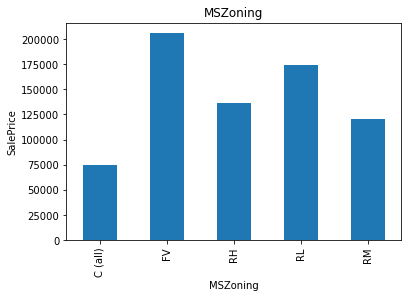

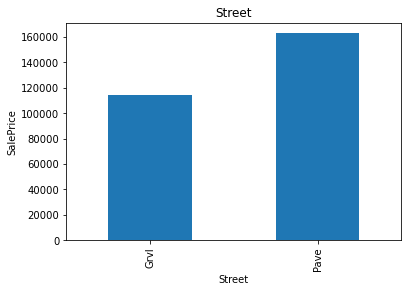

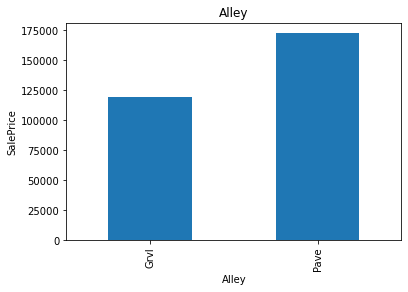

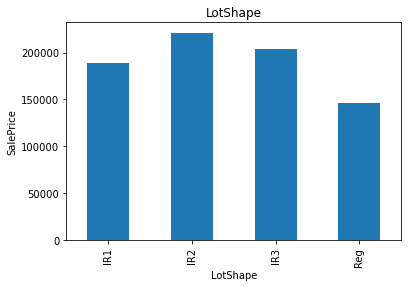

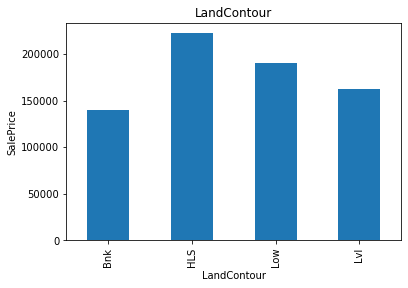

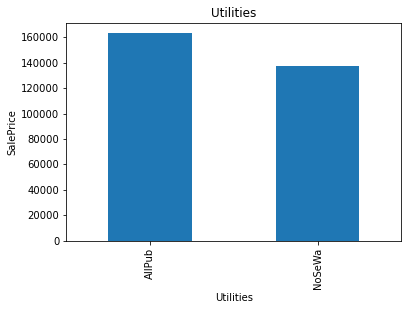

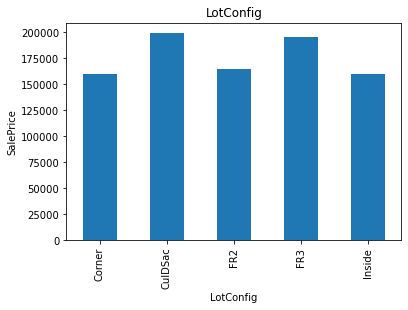

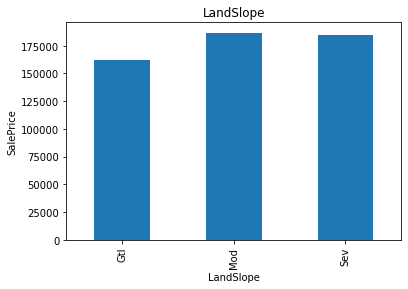

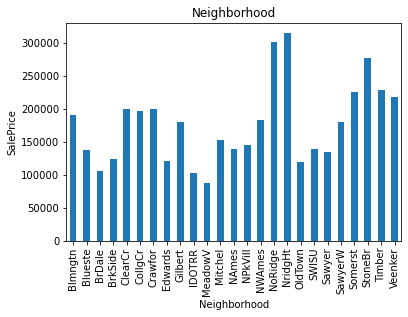

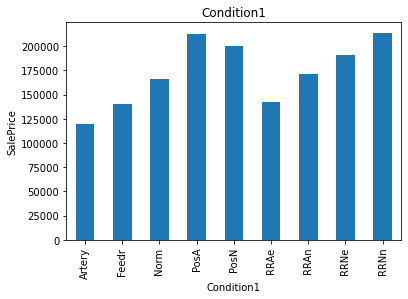

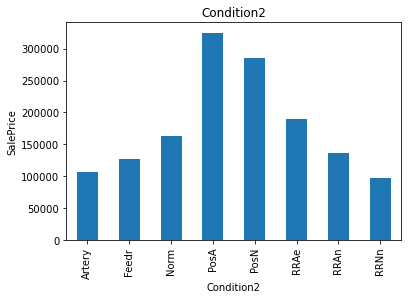

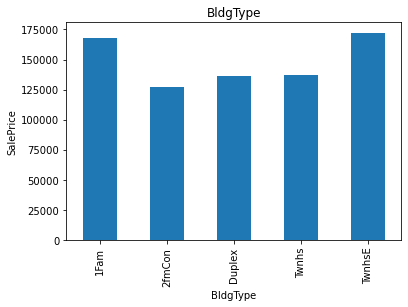

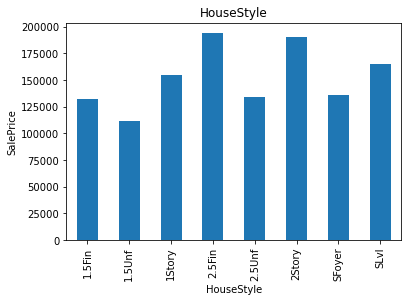

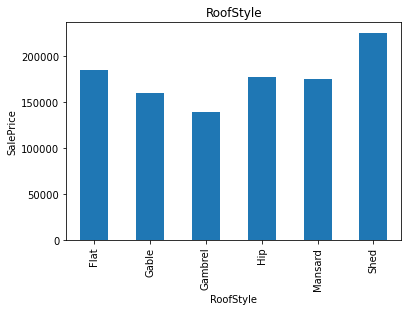

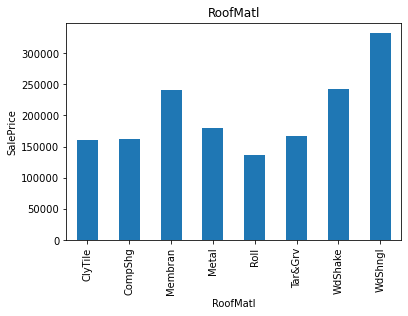

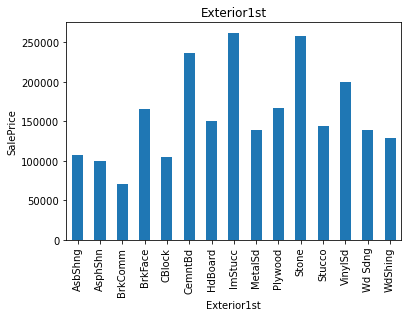

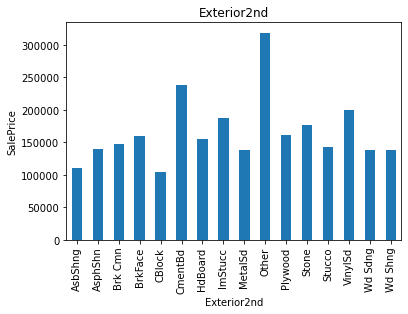

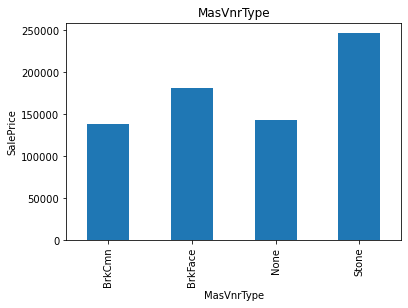

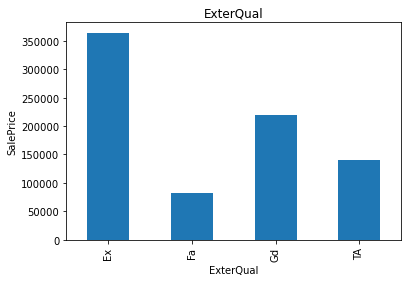

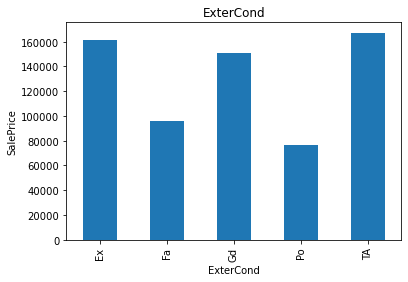

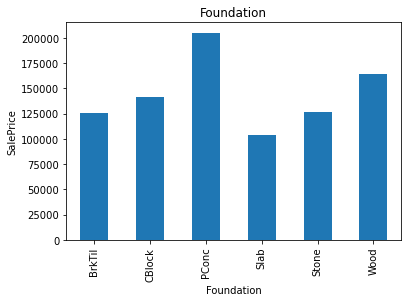

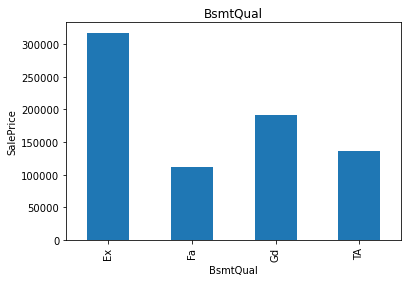

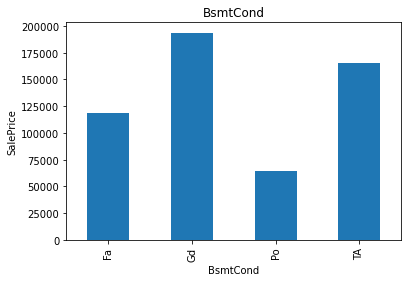

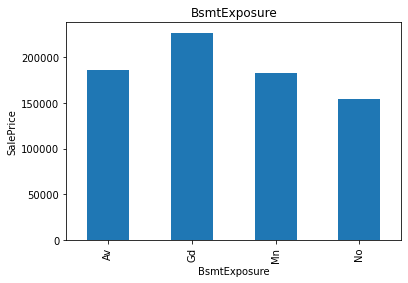

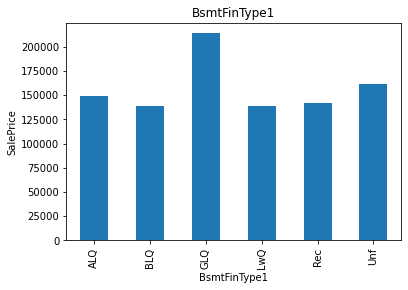

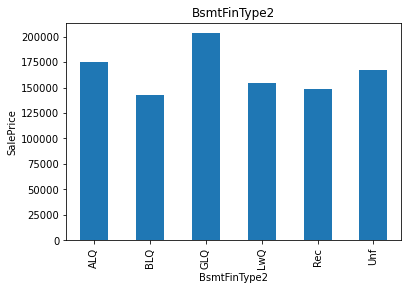

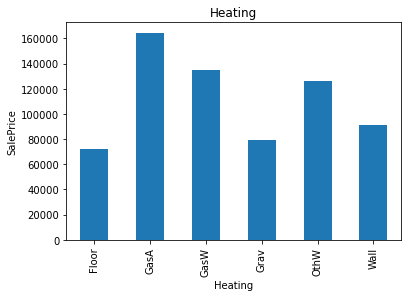

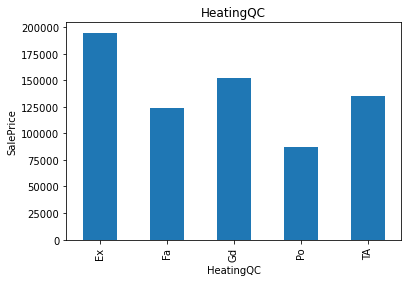

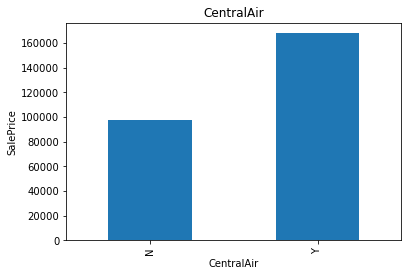

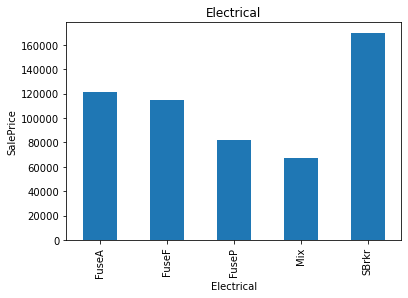

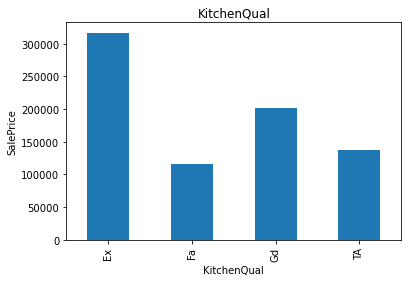

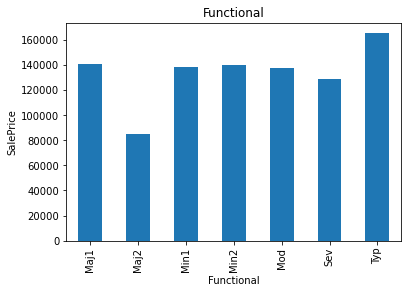

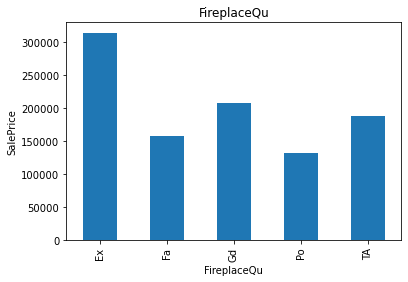

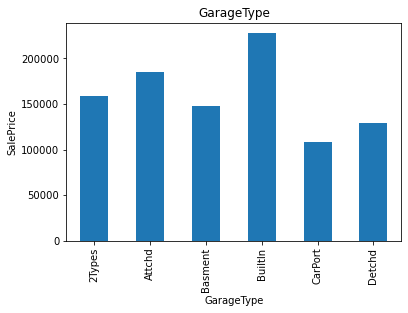

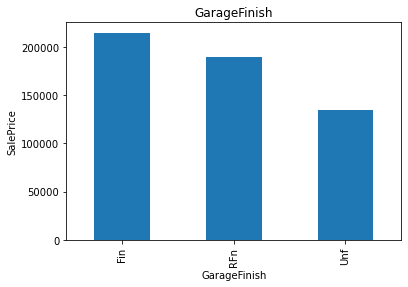

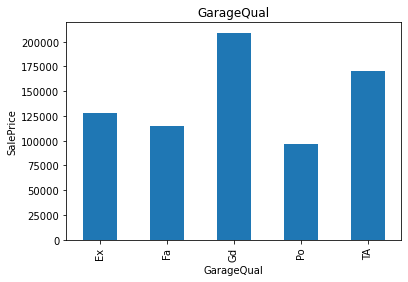

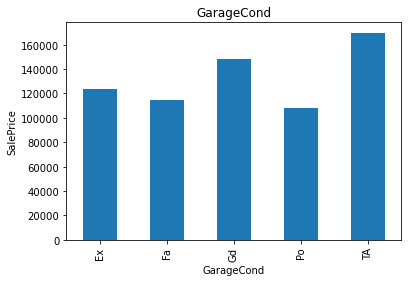

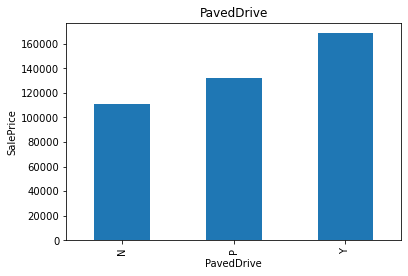

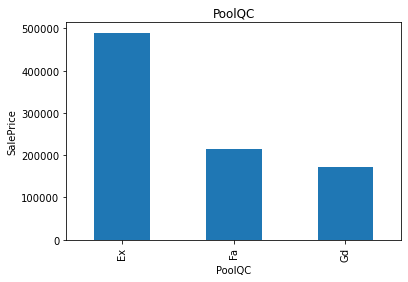

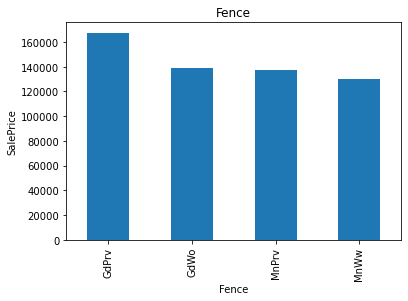

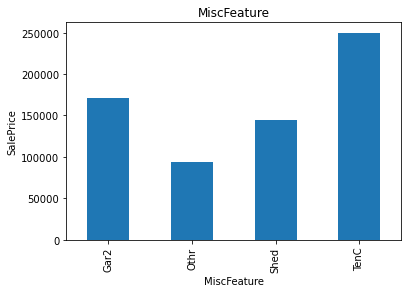

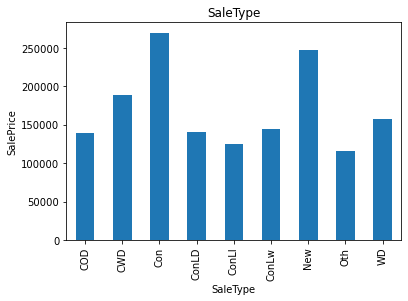

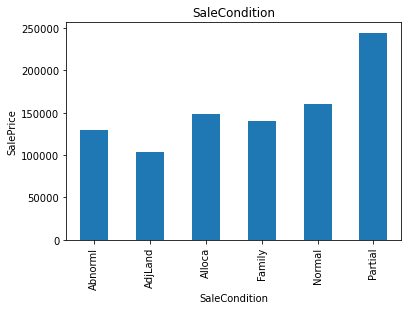

In [63]:
# Let us see the relation between Categorical features and salePrice
for F in categoricalFs:
    data_ = data.copy()
    data_.groupby(F)['SalePrice'].median().plot.bar()
    plt.xlabel(F)
    plt.ylabel('SalePrice')
    plt.title(F)
    plt.show()

**There is variation in median price of houses for most of the features. So, we can say that most features do influence the salePrice of the house.**

**This was some simple basic EDA that I performed on this data. Please do checkout the Feature Engineering notebook as continuation for this problem.**